In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import seaborn as sns
%matplotlib inline

In [16]:
from sklearn.model_selection import KFold, train_test_split, cross_val_score, StratifiedKFold, cross_validate, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.metrics import confusion_matrix, classification_report, log_loss, hinge_loss, make_scorer
from sklearn.model_selection import GridSearchCV
from pandas.plotting import table
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [17]:
Data  = pd.read_csv('Features.csv')
Data = Data.drop('N total', axis=1)
Data.head()

,Mean,Standard Deviation,SE of mean,Variance,Skewness,Kurtosis,Coefficient of Variation,Mean absolute Deviation,Mode,Harmonic Mean,Median,Flowrate
0,2.988890,0.112882,0.000564,0.012742,2.515207,10.459889,0.037767,0.070676,2.959532,2.984968,2.959532,L
1,2.992975,0.110564,0.000553,0.012224,2.621947,10.901485,0.036941,0.068431,2.959532,2.989225,2.959532,Leakages
2,2.994869,0.111194,0.000556,0.012364,2.622178,10.918732,0.037128,0.068784,2.959532,2.991081,2.959532,L
3,2.997241,0.112246,0.000561,0.012599,2.530313,10.554527,0.037450,0.069928,2.959532,2.993373,2.959532,Leakages
4,2.999304,0.111688,0.000558,0.012474,2.572693,10.724008,0.037238,0.069026,2.959532,2.995481,2.959532,L


In [18]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Mean,95.0,3.222639,0.207920,2.988890,3.069538,3.142987,3.376955,3.630129
Standard Deviation,95.0,0.216993,0.093830,0.105666,0.143042,0.178072,0.283178,0.527360
SE of mean,95.0,0.001085,0.000469,0.000528,0.000715,0.000890,0.001416,0.002637
Variance,95.0,0.055797,0.049381,0.011165,0.020461,0.031710,0.080192,0.278109
Skewness,95.0,0.427063,0.783420,-0.091415,-0.013435,0.031912,0.496227,2.622178
Kurtosis,95.0,1.608022,3.113525,-0.108863,0.031603,0.092280,1.360765,10.918732
Coefficient of Variation,95.0,0.066654,0.026465,0.032369,0.044685,0.056632,0.087628,0.145273
Mean absolute Deviation,95.0,0.170446,0.078167,0.068431,0.111500,0.143988,0.226070,0.423559
Mode,95.0,3.201996,0.207585,2.959532,3.091983,3.091983,3.334910,3.798944
Harmonic Mean,95.0,3.205519,0.201453,2.984968,3.054744,3.115231,3.359310,3.585132


<Axes: xlabel='None', ylabel='Median'>

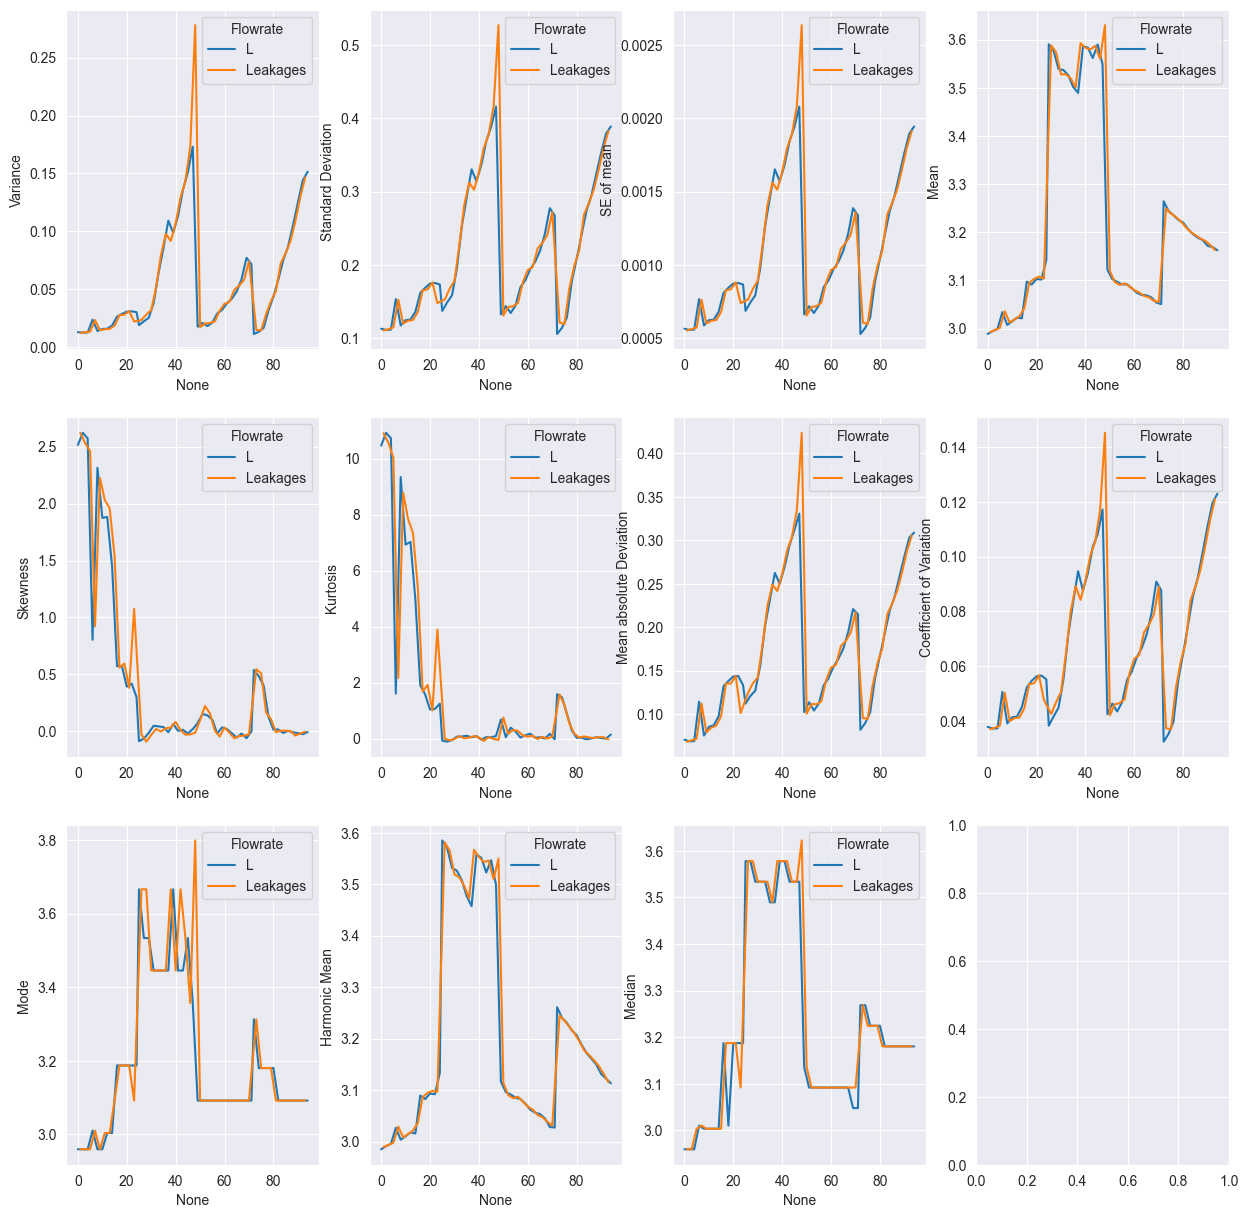

In [19]:
fig,axes = plt.subplots(3,4,figsize=(15,15))
sns.lineplot(ax = axes[0,0],data=Data, x=Data.index,y=Data['Variance'], hue=Data['Flowrate'])
sns.lineplot(ax = axes[0,1],data=Data, x=Data.index,y=Data['Standard Deviation '], hue=Data['Flowrate'])
sns.lineplot(ax = axes[0,2],data=Data, x=Data.index,y=Data['SE of mean'], hue=Data['Flowrate'])
sns.lineplot(ax = axes[0,3],data=Data, x=Data.index,y=Data['Mean '], hue=Data['Flowrate'])
sns.lineplot(ax = axes[1,0],data=Data, x=Data.index,y=Data['Skewness'], hue=Data['Flowrate'])
sns.lineplot(ax = axes[1,1],data=Data, x=Data.index,y=Data['Kurtosis'], hue=Data['Flowrate'])
sns.lineplot(ax = axes[1,2],data=Data, x=Data.index,y=Data['Mean absolute Deviation'], hue=Data['Flowrate'])
sns.lineplot(ax = axes[1,3],data=Data, x=Data.index,y=Data['Coefficient of Variation'], hue=Data['Flowrate'])
sns.lineplot(ax = axes[2,0],data=Data, x=Data.index,y=Data['Mode '], hue=Data['Flowrate'])
sns.lineplot(ax = axes[2,1],data=Data, x=Data.index,y=Data['Harmonic Mean '], hue=Data['Flowrate'])
sns.lineplot(ax = axes[2,2],data=Data, x=Data.index,y=Data['Median'], hue=Data['Flowrate'])

<Axes: >

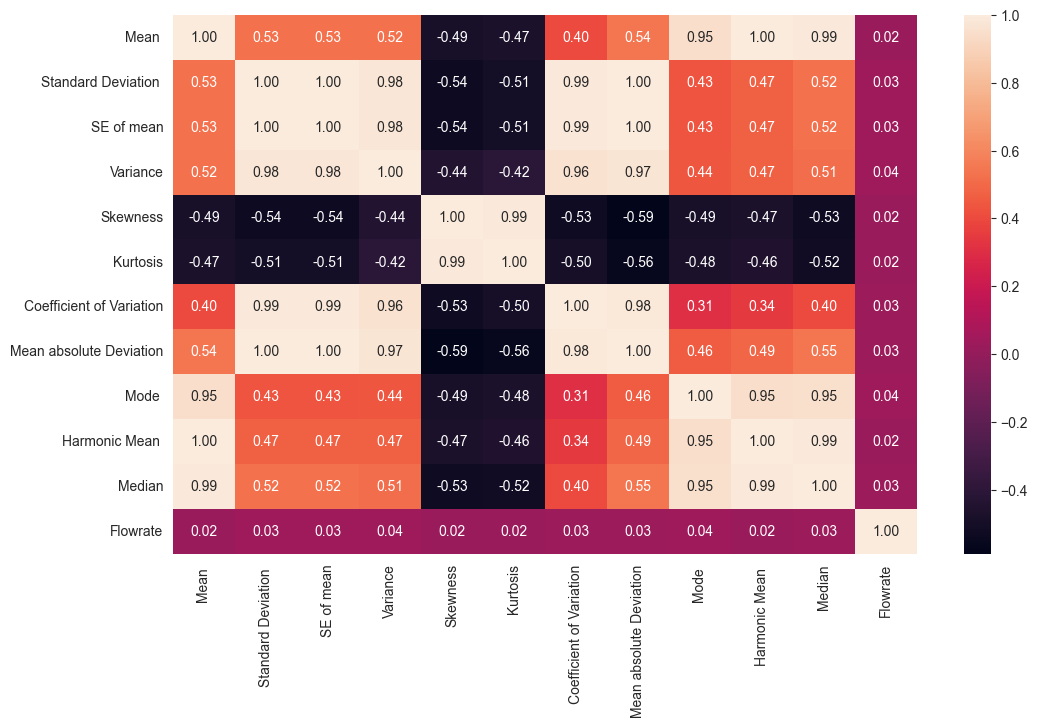

In [20]:
encoder = LabelEncoder()
scale = MinMaxScaler()
Data['Flowrate'] = encoder.fit_transform(Data['Flowrate'])
plt.figure(figsize=(12,7))
sns.heatmap(Data.corr(), annot=True, fmt='.2f')

In [21]:
Data.head()

,Mean,Standard Deviation,SE of mean,Variance,Skewness,Kurtosis,Coefficient of Variation,Mean absolute Deviation,Mode,Harmonic Mean,Median,Flowrate
0,2.988890,0.112882,0.000564,0.012742,2.515207,10.459889,0.037767,0.070676,2.959532,2.984968,2.959532,0
1,2.992975,0.110564,0.000553,0.012224,2.621947,10.901485,0.036941,0.068431,2.959532,2.989225,2.959532,1
2,2.994869,0.111194,0.000556,0.012364,2.622178,10.918732,0.037128,0.068784,2.959532,2.991081,2.959532,0
3,2.997241,0.112246,0.000561,0.012599,2.530313,10.554527,0.037450,0.069928,2.959532,2.993373,2.959532,1
4,2.999304,0.111688,0.000558,0.012474,2.572693,10.724008,0.037238,0.069026,2.959532,2.995481,2.959532,0


In [22]:
x_train, x_test, y_train, y_test = train_test_split(Data.iloc[:, :-1].values, Data.iloc[:, -1],test_size=0.2, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((76, 11), (19, 11), (76,), (19,))

In [23]:
splits = StratifiedKFold(n_splits=5,shuffle=True, random_state=0)
Svc = SVC()
Lda = LinearDiscriminantAnalysis()
Sv = cross_validate(Svc,x_train, y_train, cv=splits, return_train_score=True, return_estimator=True)
Lv = cross_validate(Lda, x_train, y_train, cv=splits,return_train_score=True, return_estimator=True)

In [24]:
scores = pd.DataFrame({'SVC': Sv['train_score'],
                      "LDA": Lv['train_score']})
scores

,SVC,LDA
0,0.500000,0.633333
1,0.508197,0.590164
2,0.508197,0.655738
3,0.540984,0.606557
4,0.508197,0.655738


In [25]:
print('SVC: ', Sv['train_score'].mean())
print('LDA: ', Lv['train_score'].mean())

SVC:  0.5131147540983606
LDA:  0.6283060109289618


In [26]:
k_neighbors =  range(3,9,2)
for k in k_neighbors:
    Cl_knn = KNeighborsClassifier(n_neighbors=k)
    knncv_scr = cross_validate(Cl_knn, x_train, y_train, cv=splits, return_estimator=True, return_train_score=True)
    knnscore = pd.DataFrame({k: knncv_scr['train_score']})   
    print(knnscore)

          3
0  0.650000
1  0.672131
2  0.704918
3  0.672131
4  0.606557
          5
0  0.616667
1  0.606557
2  0.590164
3  0.590164
4  0.590164
          7
0  0.550000
1  0.524590
2  0.573770
3  0.590164
4  0.540984
